In [62]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# quell warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### DistPlot

**Univariate - takes a single column of data:**

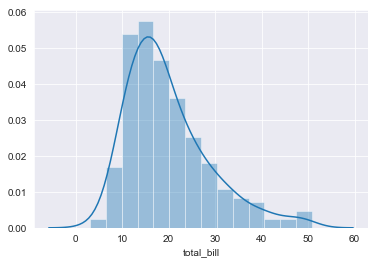

In [38]:

sns.distplot(tips['total_bill'])

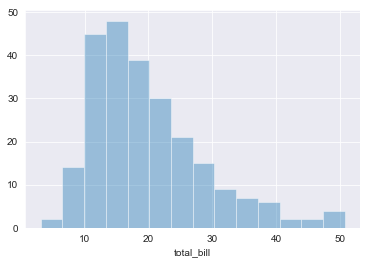

In [29]:
#Removing the Kernel Density Estimation line and leaving the Histogram
sns.distplot(tips['total_bill'],kde=False) 

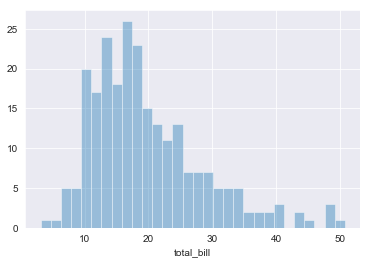

In [31]:
# Increase the number of bins in the Histogram for finer-grained visualization
# Notice more bars (bins)
sns.distplot(tips['total_bill'],kde=False,bins=30)

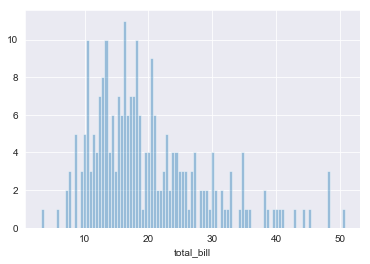

In [34]:
# setting the bins too high (getting a bar for every single bill) robs you of the power of aggregation
sns.distplot(tips['total_bill'],kde=False,bins=100)

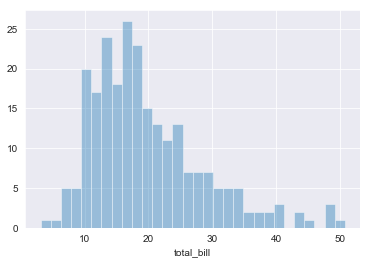

In [36]:
# Find a good balance
sns.distplot(tips['total_bill'],kde=False,bins=30)

### JointPlot


**takes bivariate data (two streams):**

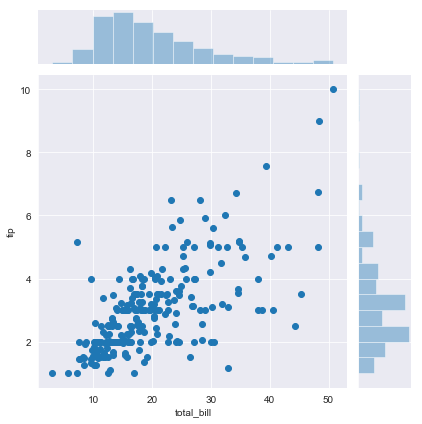

In [40]:
# Compare the relationship of Total Bill to Tips with default scatterplot
sns.jointplot(x='total_bill',y='tip',data=tips)

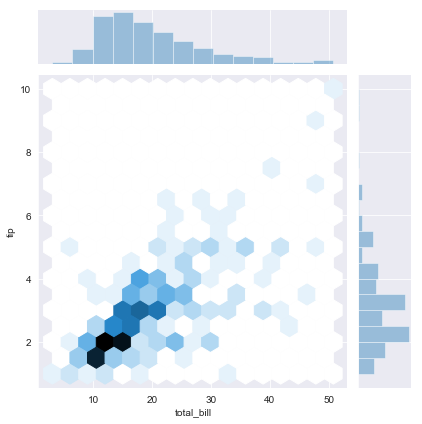

In [47]:
# Change the joint mapping from the default to hex
# Hex colors the areas with more datapoints darker
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

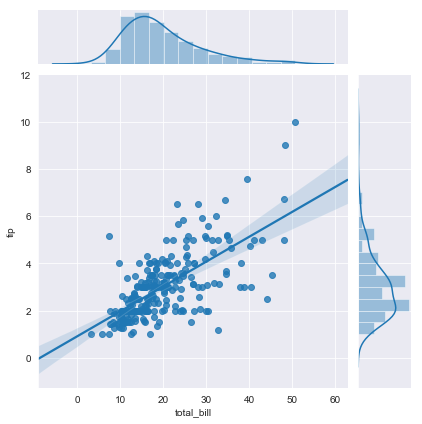

In [49]:
# Change the joint mapping from the default to regression
# Draw a Regression Fit
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

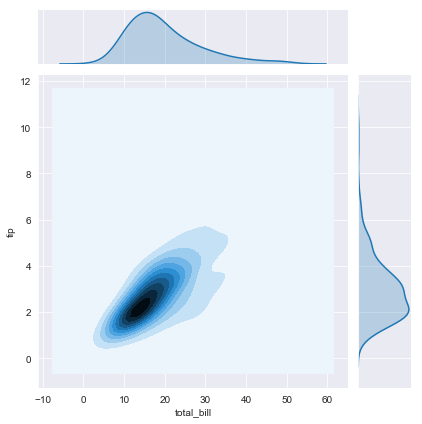

In [50]:
# Change the joint mapping from the default to kde (kernel density estimation)
# Draw a Regression Fit
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

### PairPlot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

Compares All The Numerical values. Will slow down with larger datasets or dimensions

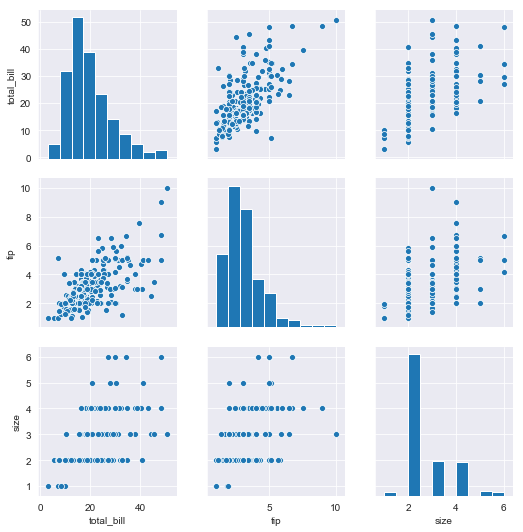

In [53]:
sns.pairplot(tips)

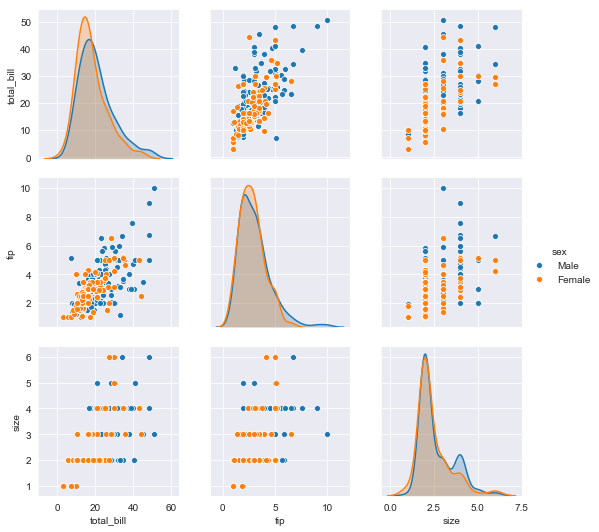

In [55]:
# Using hue to analyze the data based on a Categorical Value (like Male Or Female)
# adds dimensional color
sns.pairplot(tips,hue='sex')

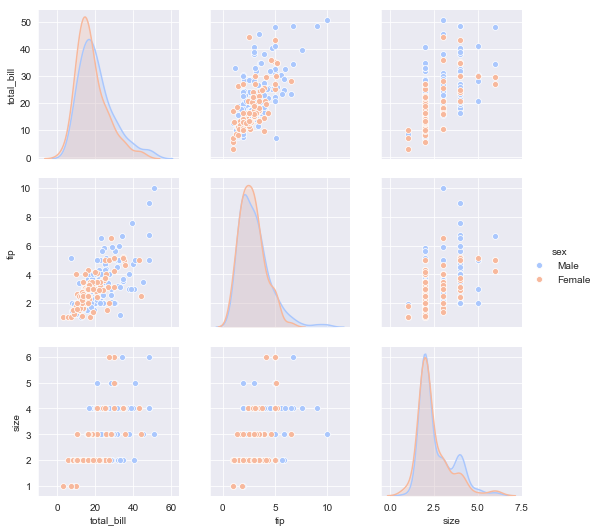

In [57]:
# Changing colors with palette
sns.pairplot(tips,hue='sex',palette='coolwarm')

### RugPlots

**Univariate - Uses a Single Column**

Display ticks (like a shag carpet) for every data point

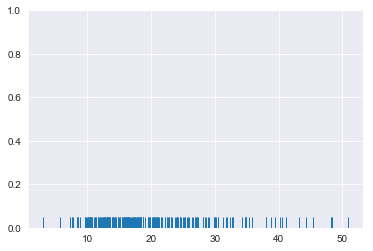

In [65]:
sns.rugplot(tips['total_bill'])

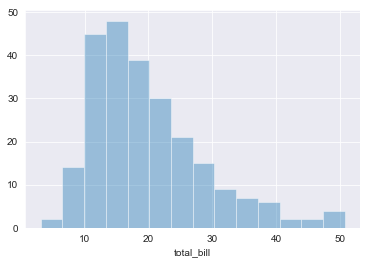

In [66]:
# Compare with a Histogram.

sns.distplot(tips['total_bill'],kde=False)

What is a KDE?
https://mathisonian.github.io/kde/

**How do we build a KDE line from a rug plot?**
A KDE is the sum of all the normal distributions from the center points on a rug plot.

(0, 1)

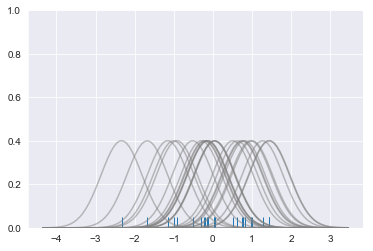

In [67]:
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

**sum the normal distributions to create the KDE**

Text(0.5, 0.98, 'Sum of the Basis Functions')

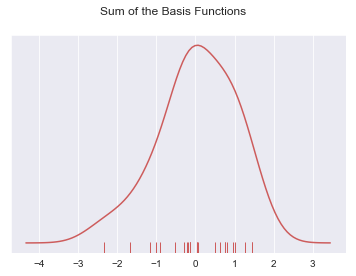

In [68]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## Categorical Plots

Categorical plots are a way to reference categories (gender, smoker, day, time - non-numerical) compared to numerical data or other categories

### Bar Plots

A general plot that allows you to aggregate the categorical data based off some function - typically the .mean()

A visualization of a .groupby() action

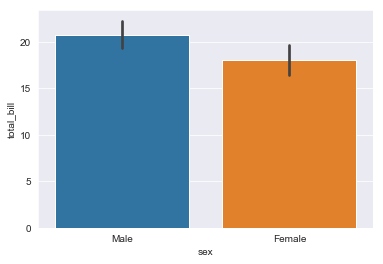

In [74]:
# Compare Gender to mean Amount Of Total Bill
sns.barplot(x='sex',y='total_bill',data=tips)

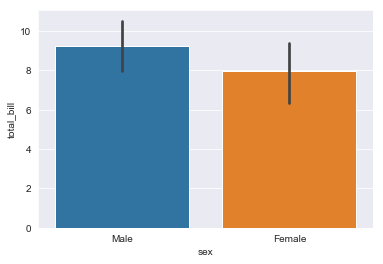

In [77]:
# Add an Estimator object (some sort of aggregate function like .mean())
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # notice .std doesn't use .std()

### CountPlot

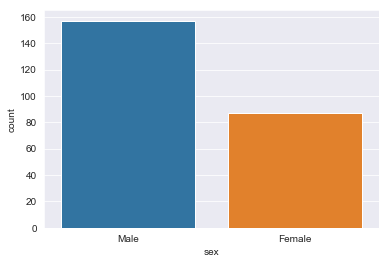

In [79]:
# like a barplot, but the Estimator is explicitly counting the number of occurrances
# Since it's univariate, only count the X value
sns.countplot(x='sex',data=tips)

### BoxPlots and ViolinPlots
Used to show the Distribution of Categorical Data. 

**Boxplot** also called **Box And Whisker Plot**
Shows the distribution of Qualitative Data that facilitates comparison between the variables

### BoxPlot

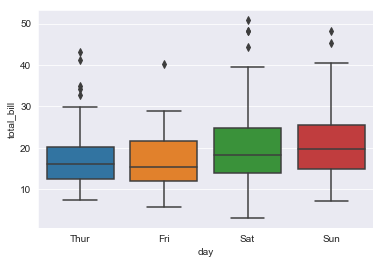

In [82]:
# x will be Categorical, Y will be numerical
# The Boxes are the main chunks of data, the dots are the outliers
sns.boxplot(x='day',y='total_bill',data=tips)

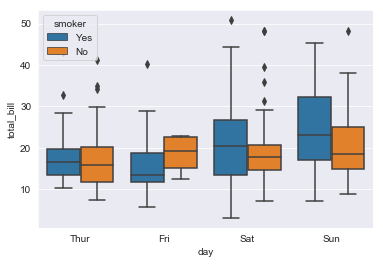

In [83]:
# Add "hue" to add another categorical dimension
# The Boxes are the main chunks of data, the dots are the outliers
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

### ViolinPlot

Allows us to plot all the components that correspond to actual datapoints. Essentially showing the Kernel Density of the Underlying Distribution.

A little harder to read than a boxplot, but with more information

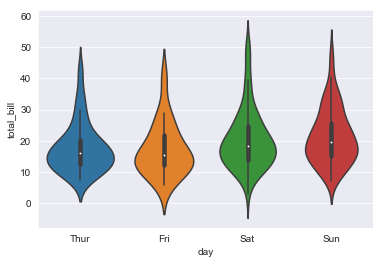

In [88]:
# Takes the same data as a boxplot - A Categorical, A Numeric and will also take a Hue category
sns.violinplot(x='day',y='total_bill',data=tips)

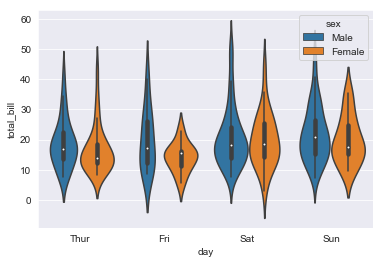

In [89]:
# Also with Smoker as a Hue
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

The density in information comes at the cost of readability. Violin plots are great for data scientists who know what they're looking at, but Box Plots are better for CEOs, et al

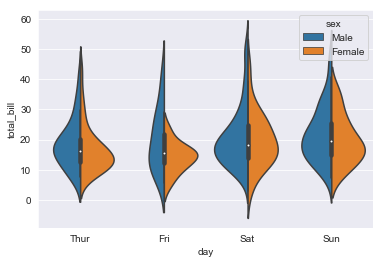

In [92]:
# You can simplify this - instead of doubling up for the sex category, split the color/shape
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

### Strip Plot

A strip plot is a scatter plot where one variable is categorical

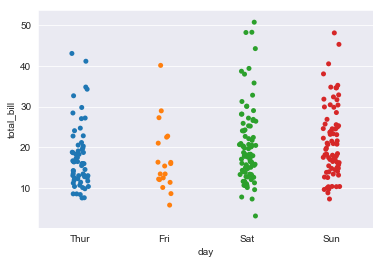

In [94]:
sns.stripplot(x='day',y='total_bill',data=tips)

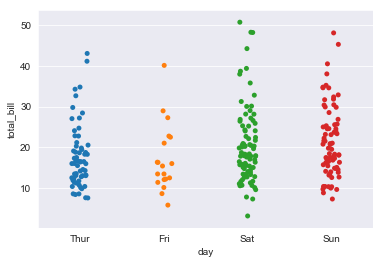

In [99]:
# using the Jitter flag adds a little bit of random noise to make it easier to see the scatter clumps
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

### Swarm Plot
Like a strip plot but the points are adjusted so they don't overlap.
One drawback is it doesn't scale well to very large numbers

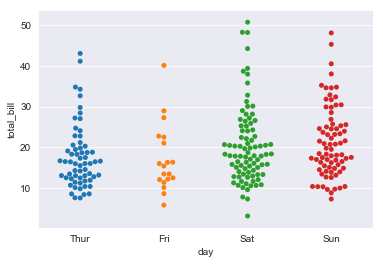

In [100]:
sns.swarmplot(x='day',y='total_bill',data=tips)

### Combining the swarm with a violin plot

Better for exploratory visualization and not for presentation

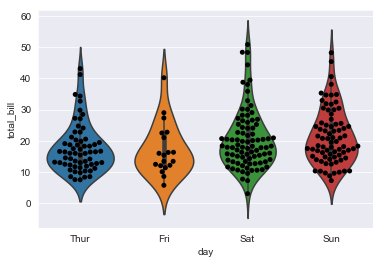

In [102]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

### FactorPlot

deprecated. use catplot

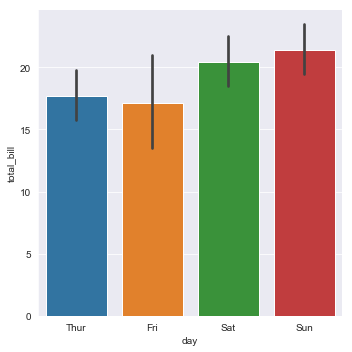

In [103]:
# Takes in x and y arguments as well as a 'kind' argument
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

### CatPlot


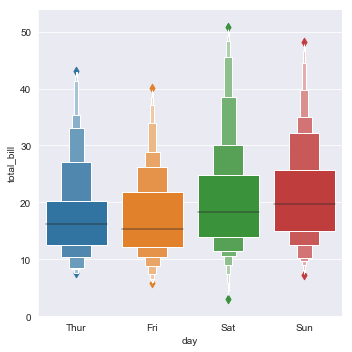

In [106]:
# The new factorplot (with boxen) for categories
sns.catplot(x='day',y='total_bill',data=tips,kind='boxen')

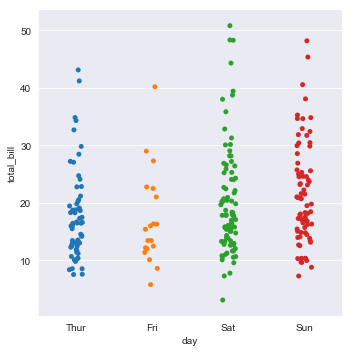

In [107]:
# Without kind= set, defaults to something swarm-plotty
sns.catplot(x='day',y='total_bill',data=tips)

## Matrix Plots


### Heatmaps

Heatmaps are a way to show a matrix plot. For a heatmap to work correctly, the data should already be in a matrix form - e.g The index name and the column name match up so that the cell value is relevant to both of those names.

To get something into Matrix Format you need to have variables on both the columns and the rows

In [108]:
flights = sns.load_dataset('flights')

In [115]:
# Show the number of passengers that flew in a given month in a given year
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [116]:
# Notice that the index for this has no categories for the rows - just an index number
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


**We can get this into Matrix form by a number of methods, usually Pivot Table or Correlation Data.**

**Here is an example using Correlation Data:**

In [243]:
# using .corr()
# Now Total Bill Correlates to Total Bill 1 to 1 (they are the same). 
# This is the form the data needs to be to call heatmap()
# First set up the correlation
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


**Allows you see what the numbers and values are relative to each other**

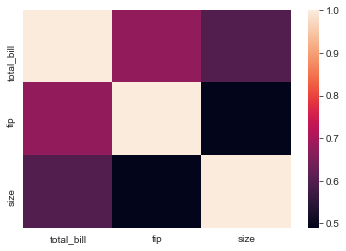

In [121]:
tc = tips.corr()
sns.heatmap(tc)

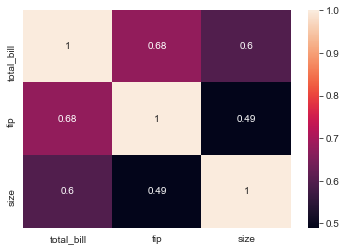

In [123]:
# Adding Annotations
sns.heatmap(tc,annot=True)

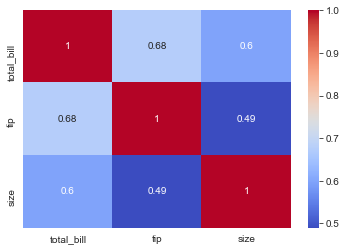

In [124]:
# Adding Color Maps
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [125]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


**Setting a pivot table for flights**

In [128]:
# now in matrix form
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


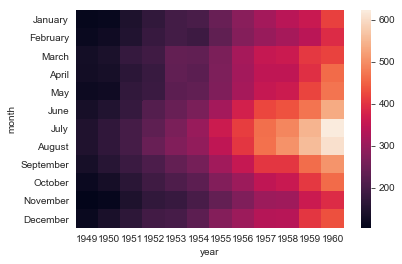

In [130]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(fp)

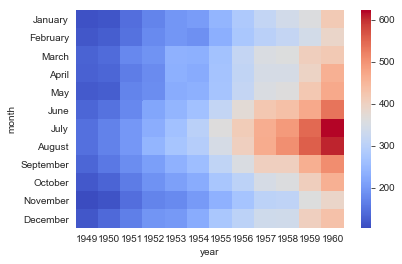

In [136]:
# A little easier to see with different colors
sns.heatmap(fp,cmap='coolwarm')

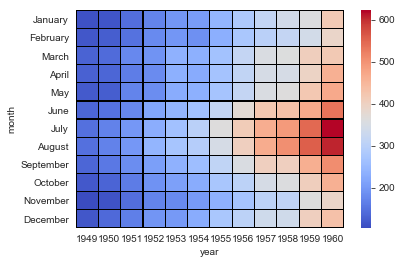

In [140]:
# Adding linecolor and linewidths
sns.heatmap(fp,cmap='coolwarm', linecolor='black',linewidths=.25)

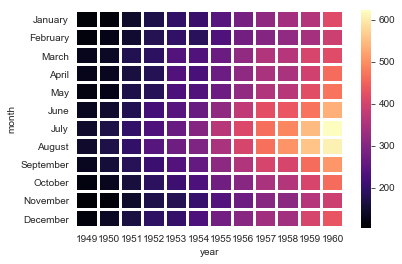

In [141]:
# magma with a white, thicker line
sns.heatmap(fp,cmap='magma', linecolor='white',linewidths=2)

### ClusterMap

Uses Hierarchical Clustering to produce a heatmap

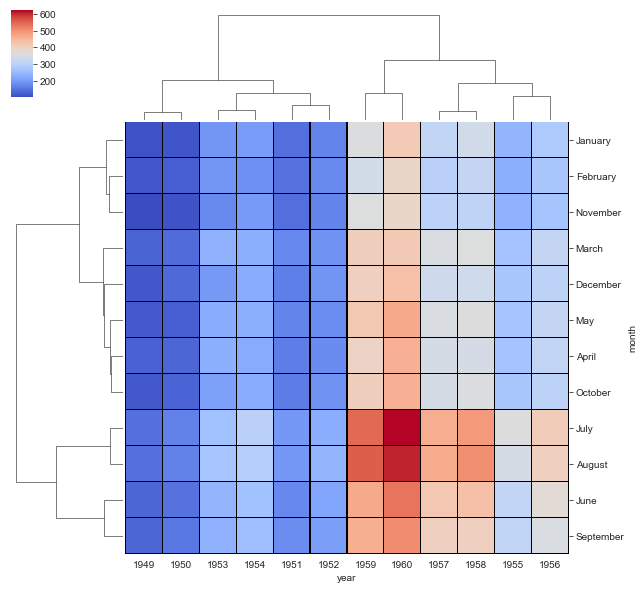

In [148]:
# Notice that the row and column labels are no longer in order - they're clustering Most Similar Data together
sns.clustermap(fp,linecolor='black',linewidths=.10,cmap='coolwarm')

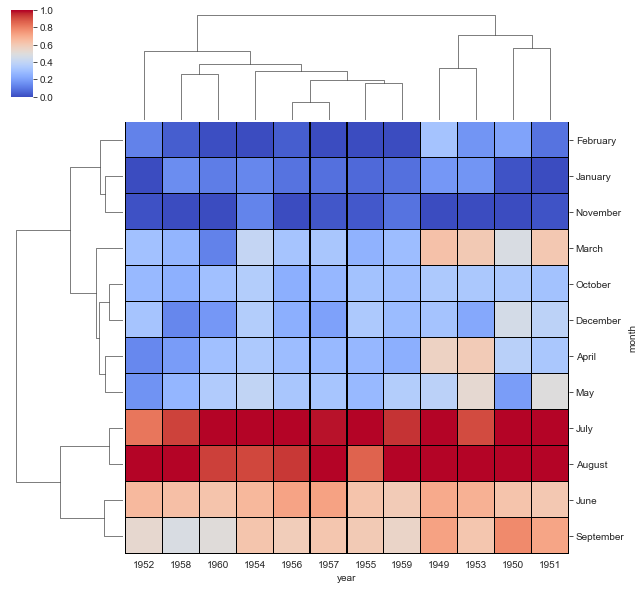

In [149]:
# Standardize the scale
sns.clustermap(fp,linecolor='black',linewidths=.10,cmap='coolwarm',standard_scale=1)

## Grids
Automating subplots based on features in the data

In [150]:
# Import the iris dataset
iris = sns.load_dataset('iris')

In [151]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [152]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [153]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### PairPlot

PairPlot is a simplified version of PairGrid.

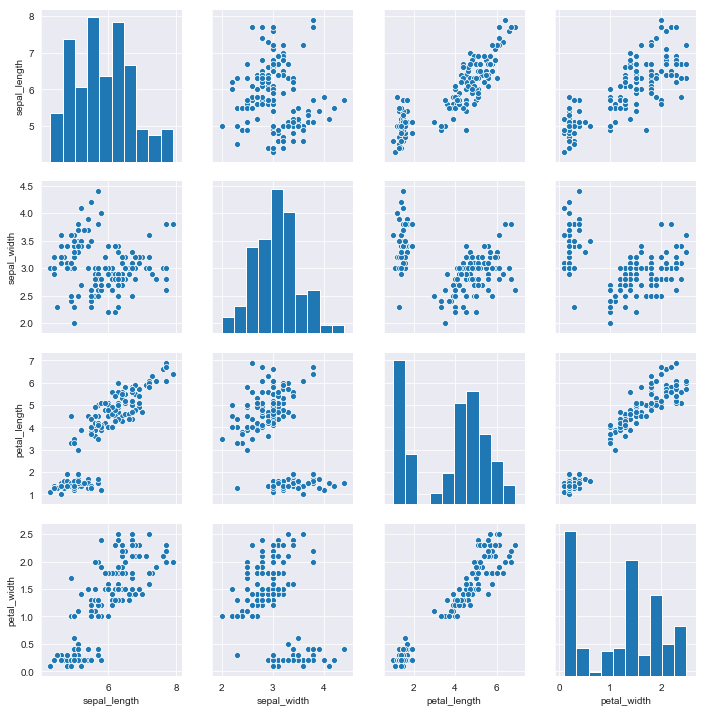

In [154]:
sns.pairplot(iris)

### PairGrid
Takes more work than pairplot, but gives more control

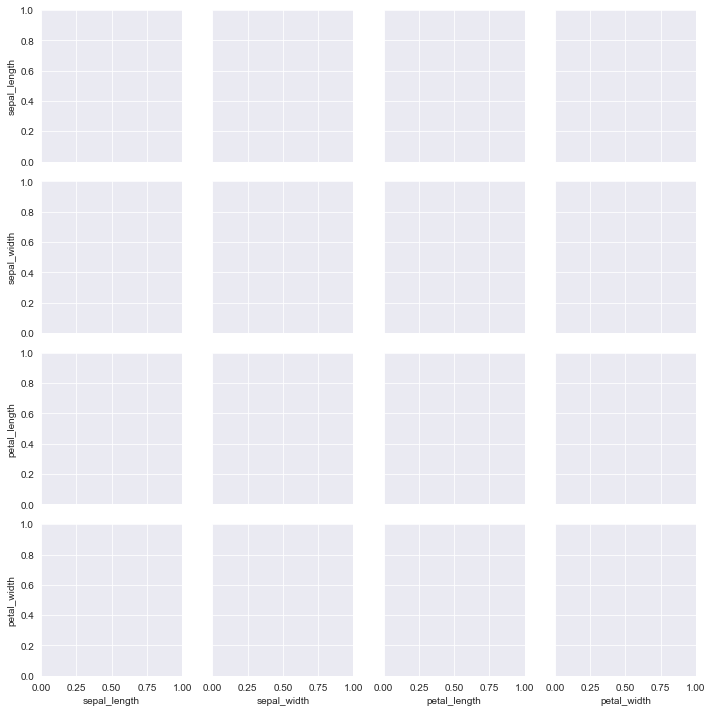

In [156]:

sns.PairGrid(iris)

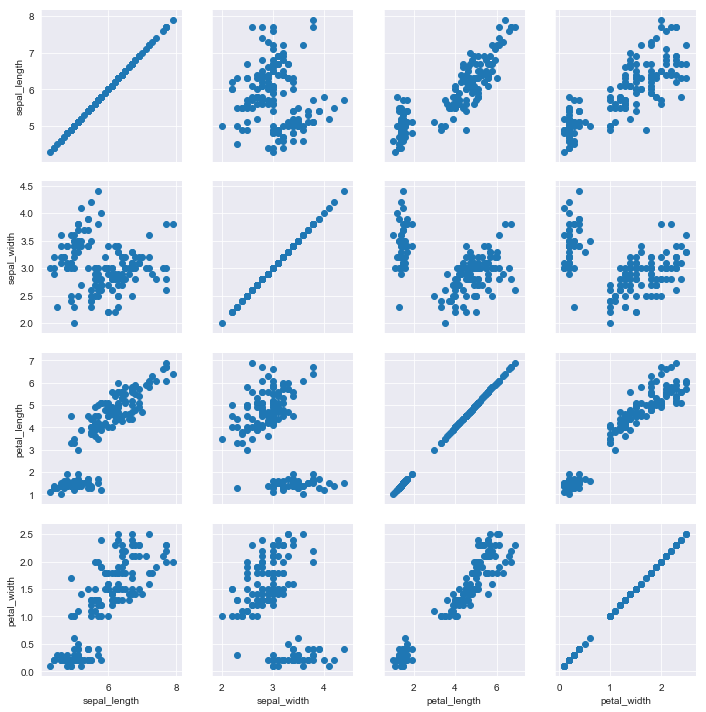

In [165]:
# set the grid equal to a variable, then map from that variable
g = sns.PairGrid(iris)
# generate a Scatter Plot with .map(plottype)
g.map(plt.scatter)

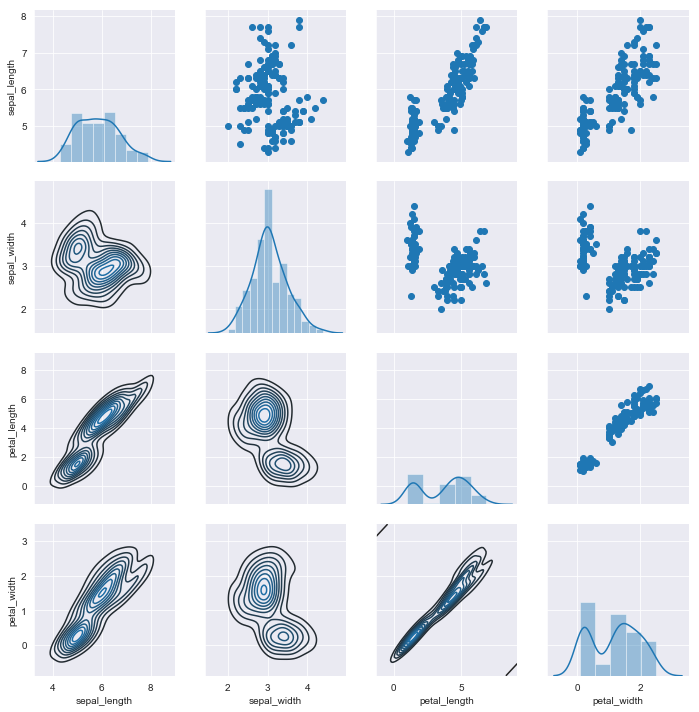

In [167]:
# breaking out the map areas
g = sns.PairGrid(iris) # must rerun this for each cell
g.map_diag(sns.distplot) # not closing parens for the plots
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## FacetGrid

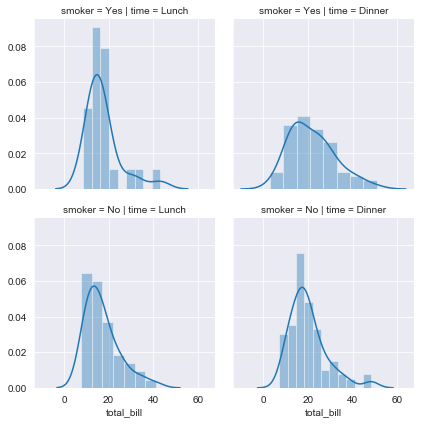

In [174]:
# running FacetGrid on tips
# Step 1 - what data do you want to use to create the Grid?
g1 = sns.FacetGrid(data=tips,col='time',row='smoker')
# Step 2 - What data do you want to map?
g1.map(sns.distplot,'total_bill')

**Using ScatterPlot (two datapoints)**

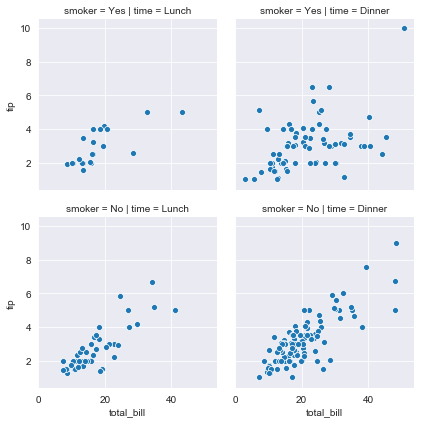

In [176]:
# Step 1 - what data do you want to use to create the Grid?
g1 = sns.FacetGrid(data=tips,col='time',row='smoker')
# Step 2 - What data do you want to map?
g1.map(sns.scatterplot,'total_bill','tip')

## Regression Plots

### lmplots
lmplot = Linear Model Plot

In [179]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


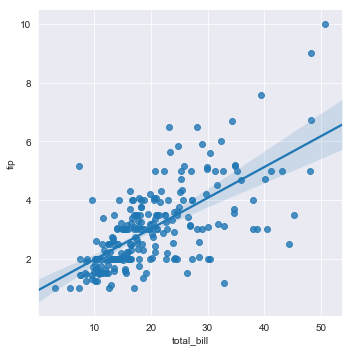

In [184]:
#
sns.lmplot(x='total_bill',y='tip',data=tips) # data must not be enclosed in quotes

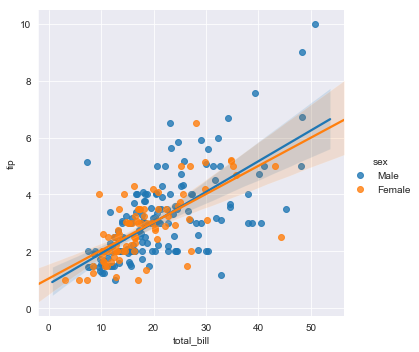

In [185]:
# Add hue='sex'
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

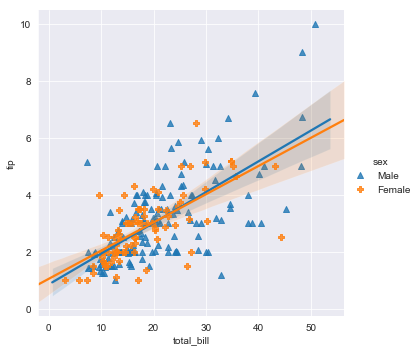

In [191]:
# passing in matplotlib parameters
# using a list of markers
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['^','P']) 

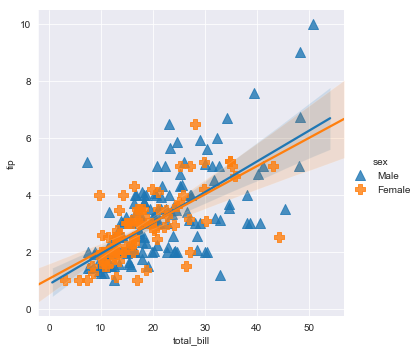

In [197]:
# Adding in the scatter_kws - add matplotlib params directly into scatter with a dictionary
# When Seaborn calls lmplot, it's calling matplotlib under the hood.
# This is making the markers bigger (s = 'size of scatterplot')
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['^','P'],
           scatter_kws={'s':100}) 

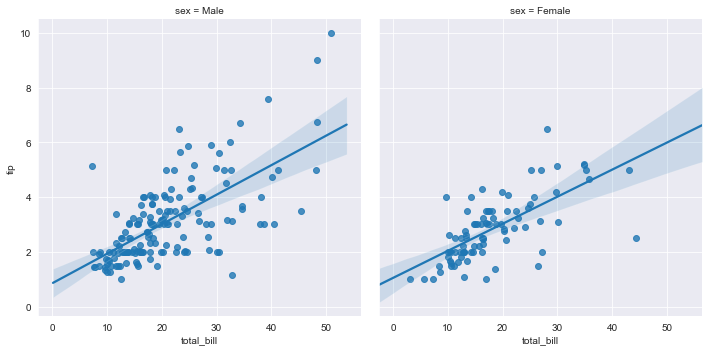

In [199]:
# instead of using 'hue' to color a type of data within the same grid, use 'col' to call two separate plots
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') 

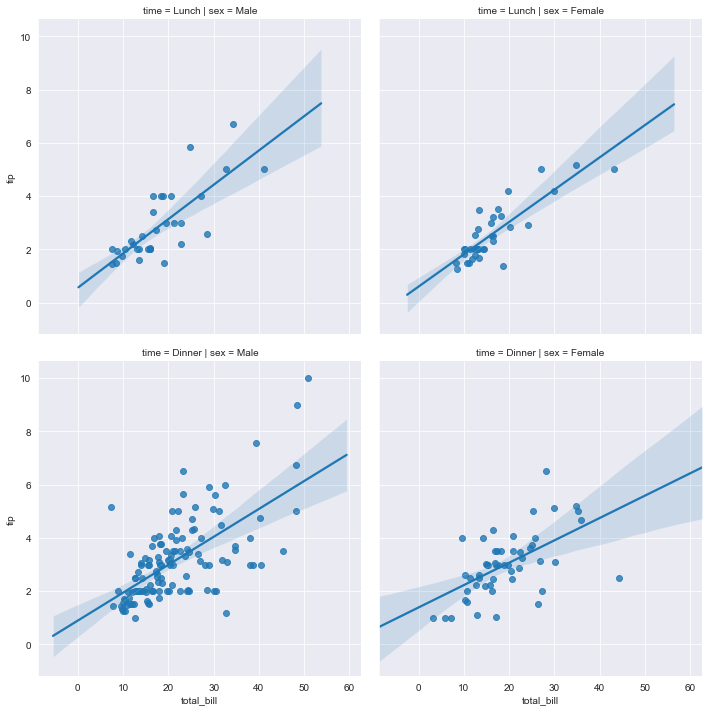

In [202]:
# adding another set of plots with 'row'
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time') 

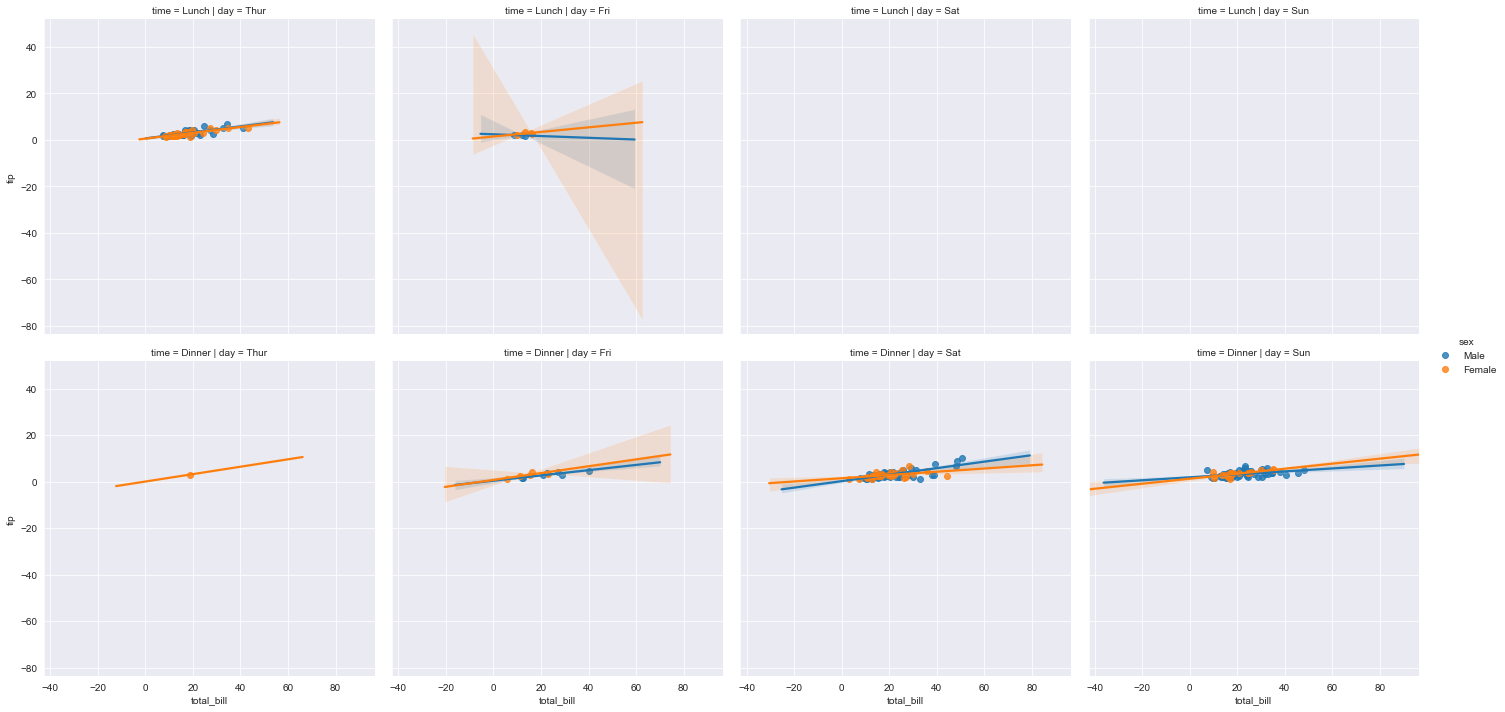

In [203]:
# adding Hue back in
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='time',hue='sex') 

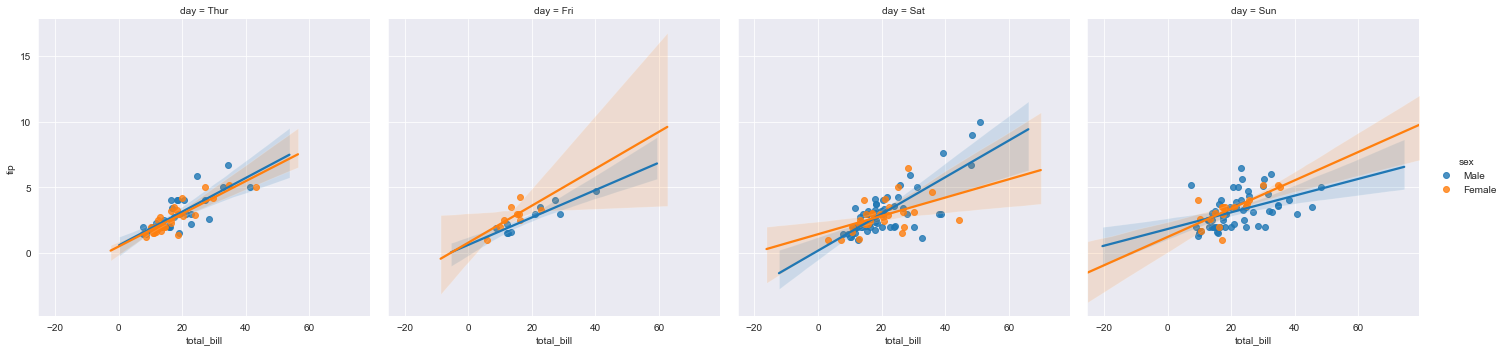

In [205]:
# removing row to simplify
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex') 

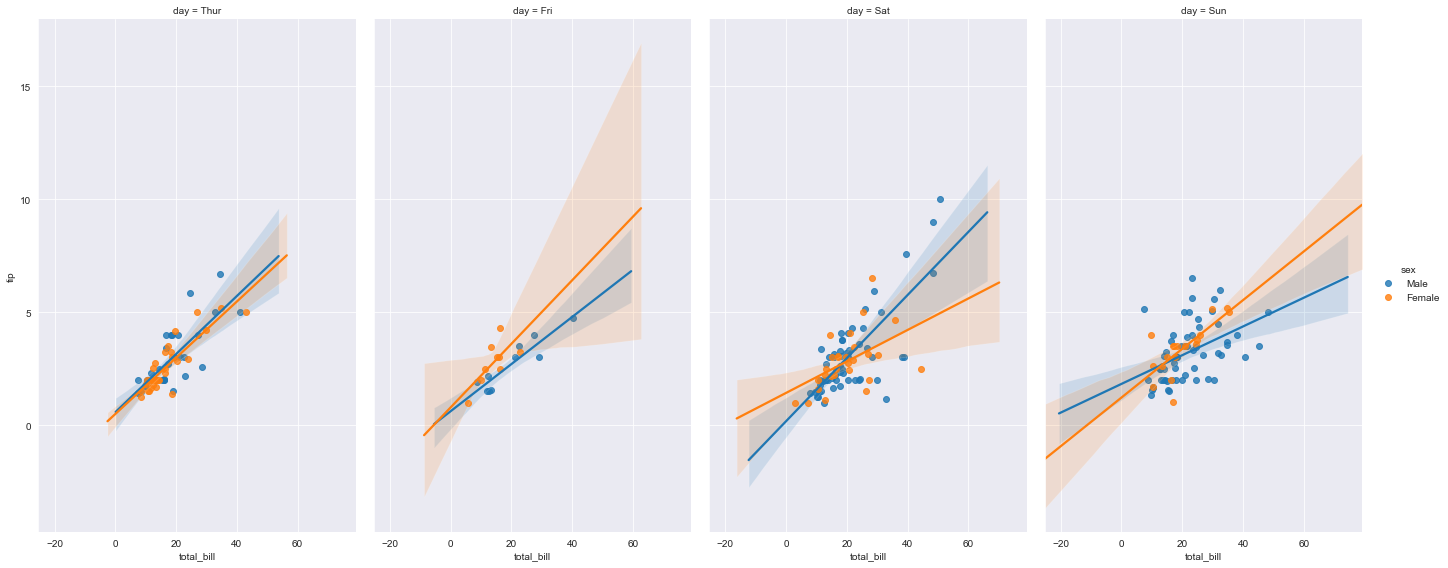

In [208]:
# Making it easier to read with Aspect and Size
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8) 

## Style And Color

### Styles

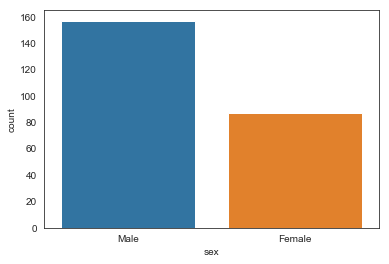

In [210]:
# using set_style to change the background
sns.set_style('white')
sns.countplot(x='sex',data=tips)

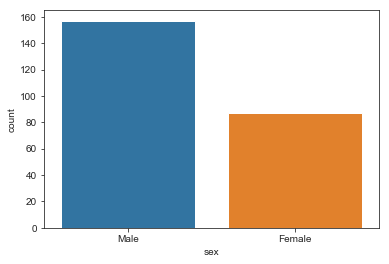

In [212]:
# adding ticks at the edge of the box
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

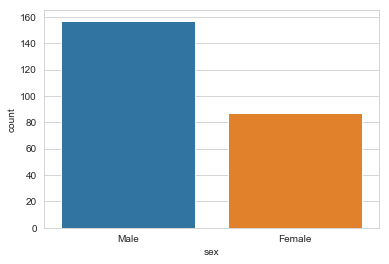

In [219]:
# whitegrid (my default)
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

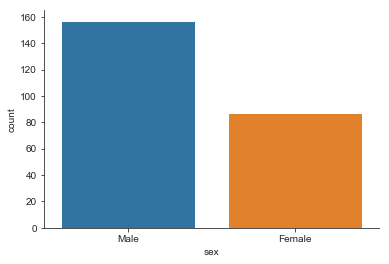

In [223]:
# remove spines (can be specific about top, right, left and bottom. despine removes top and right by default)
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

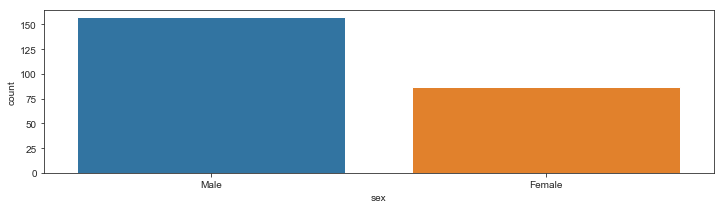

In [226]:
# Size and Aspect Ratio
# Set styles stay in place until you call a new style
plt.figure(figsize=(12,3)) #MatPlotLib is now setting the defaults for the later seaborn calls
sns.countplot(x='sex',data=tips)

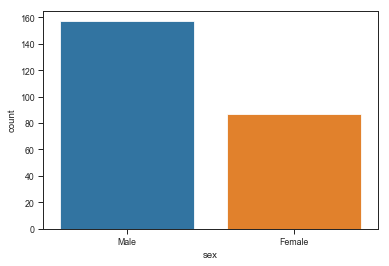

In [235]:
# Maybe this is being made for a poster, not a notebook using sns.set_context()
# context can be: paper, notebook, talk or poster:
# versions of the notebook parameters scaled by .8, 1.3, and 1.6 respectively.
# Paper
sns.set_context(context='paper')
sns.countplot(x='sex',data=tips)

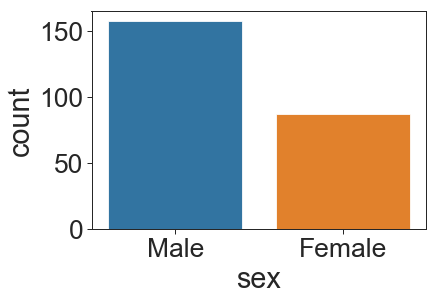

In [236]:
# Paper with adjusted Font Scale
sns.set_context(context='paper',font_scale=3)
sns.countplot(x='sex',data=tips)

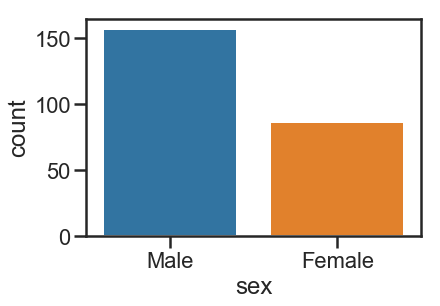

In [237]:
# Poster
sns.set_context(context='poster')
sns.countplot(x='sex',data=tips)

### Palettes

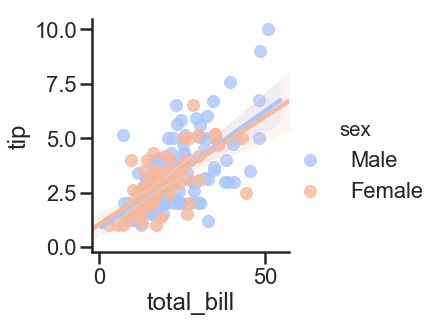

In [242]:
# notice we're still in poster mode
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

**ColorMap documentation**

https://matplotlib.org/tutorials/colors/colormaps.html

*Classes of colormaps*

Sequential:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']


cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
            
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']